# Kaggle 레드 와인 품질(Red Wine Quality) 데이터 분석 및 예측

이 노트북은 Kaggle의 [Red Wine Quality](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009) 데이터셋을 사용하여 와인의 화학적 특성에 따른 품질을 예측하는 과정을 담고 있습니다.

## 데이터셋 정보
- **입력 특성 (11개)**:
  1. **fixed acidity**: 결합 산도
  2. **volatile acidity**: 휘발성 산도
  3. **citric acid**: 구연산
  4. **residual sugar**: 잔류 당분
  5. **chlorides**: 염화물
  6. **free sulfur dioxide**: 유리 이산화황
  7. **total sulfur dioxide**: 총 이산화황
  8. **density**: 밀도
  9. **pH**: 산성도
  10. **sulphates**: 황산염
  11. **alcohol**: 알코올 도수
- **출력 특성 (1개)**:
  - **quality**: 품질 (0~10 사이의 점수, 실제 데이터는 3~8 분포)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 시각화 설정
%matplotlib inline
sns.set(style='whitegrid')
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 깨짐 방지 (Windows)
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드 (UCI 저장소의 데이터 URL 사용)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

print("데이터 로드 완료. 데이터 크기:", df.shape)
df.head()

데이터 로드 완료. 데이터 크기: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 1. 탐색적 데이터 분석 (EDA)

C:\Users\user\AppData\Local\Temp\ipykernel_18424\1502850902.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='quality', palette='viridis')


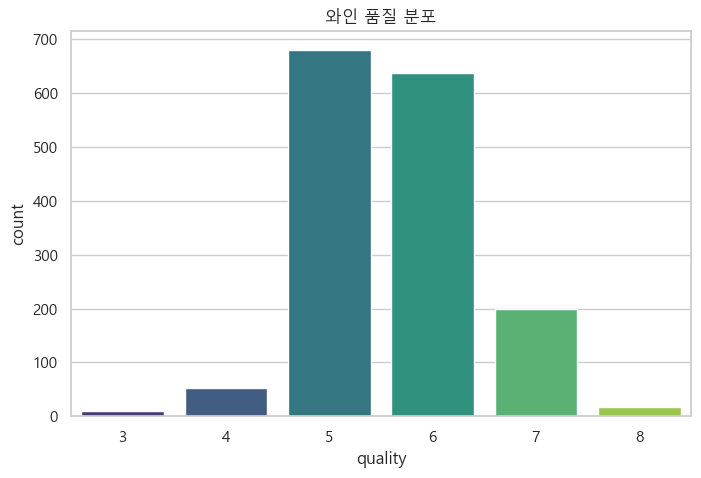

In [2]:
# 품질 분포 확인
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='quality', palette='viridis')
plt.title('와인 품질 분포')
plt.show()

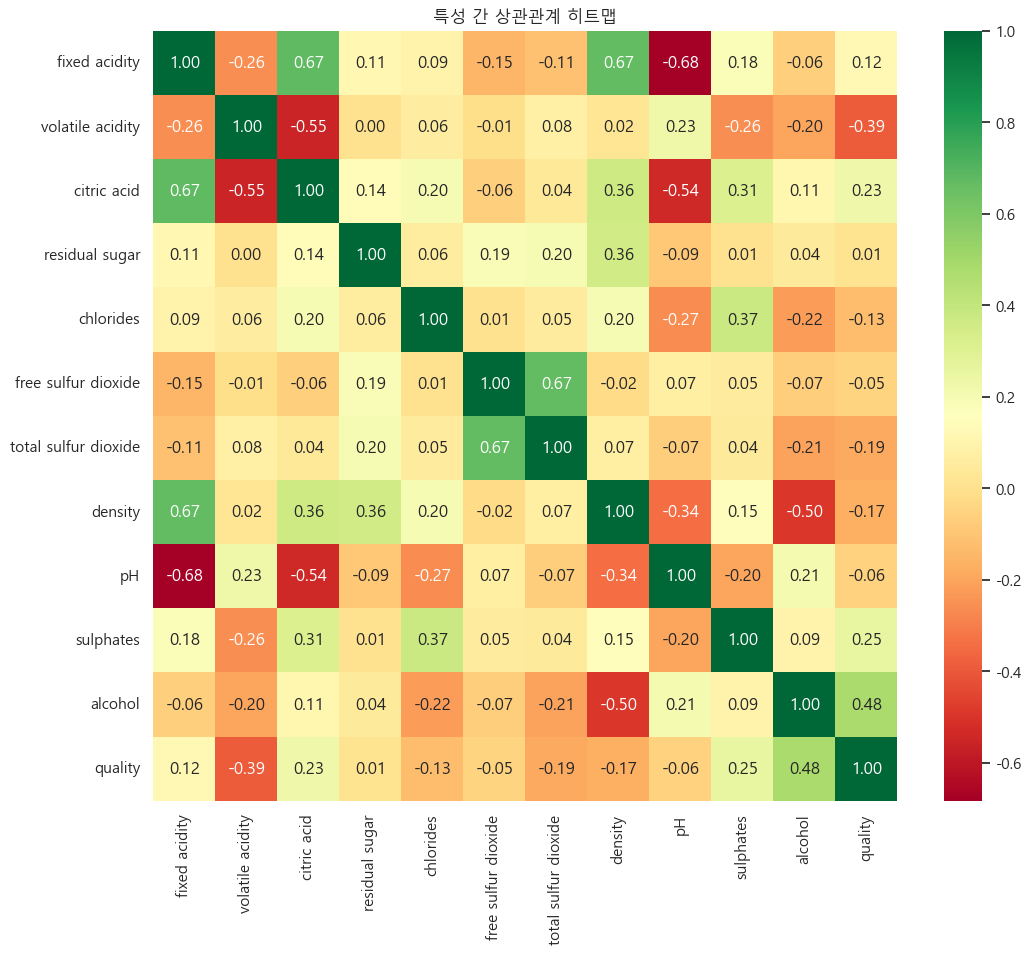

In [3]:
# 특성 간 상관관계 히트맵
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='RdYlGn')
plt.title('특성 간 상관관계 히트맵')
plt.show()

In [ ]:
# 품질에 따른 알코올 농도 박스플롯
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title('품질별 알코올 농도 분포')
plt.show()

## 2. 데이터 전처리 및 특성 엔지니어링

In [ ]:
# 특성과 타겟 분리
X = df.drop('quality', axis=1)
y = df['quality']

# 데이터 분할 (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 스케일링 (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("데이터 처리 완료.")

## 3. 8가지 모델 비교 분석

In [ ]:
# 비교할 8가지 모델 정의
models = {
    'LR': LogisticRegression(max_iter=1000),
    'RF': RandomForestClassifier(random_state=42),
    'SVC': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(),
    'DT': DecisionTreeClassifier(random_state=42),
    'GBM': GradientBoostingClassifier(random_state=42),
    'Ada': AdaBoostClassifier(random_state=42),
    'ET': ExtraTreesClassifier(random_state=42)
}

# 교차 검증을 통한 성능 비교
results = []
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    results.append({'Model': name, 'Mean Accuracy': cv_scores.mean()})

results_df = pd.DataFrame(results).sort_values(by='Mean Accuracy', ascending=False)
print("--- 모델 성능 순위 ---")
print(results_df)

In [ ]:
# 모델 성능 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Mean Accuracy', y='Model', data=results_df, palette='magma')
plt.title('8가지 모델 성능 비교 (교차 검증 정확도)')
plt.xlim(0, 1)
plt.show()

## 4. 상위 4개 모델 앙상블 및 하이퍼 파라미터 튜닝

In [ ]:
# 상위 4개 모델 이름 추출
top_4_models = results_df.head(4)['Model'].values
print("앙상블에 사용될 상위 4개 모델:", top_4_models)

# 튜닝을 위한 하이퍼파라미터 그리드 (예시로 주요 모델 일부만 튜닝)
param_grids = {
    'RF': {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]},
    'ET': {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]},
    'GBM': {'n_estimators': [100, 150], 'learning_rate': [0.1, 0.05]},
    'SVC': {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}
}

tuned_estimators = []
for name in top_4_models:
    if name in param_grids:
        print(f"{name} 하이퍼 파라미터 튜닝 중...")
        grid = GridSearchCV(models[name], param_grids[name], cv=3, n_jobs=-1)
        grid.fit(X_train_scaled, y_train)
        tuned_estimators.append((name, grid.best_estimator_))
    else:
        tuned_estimators.append((name, models[name].fit(X_train_scaled, y_train)))

# 보팅 앙상블 (Soft Voting)
ensemble_model = VotingClassifier(estimators=tuned_estimators, voting='soft')
ensemble_model.fit(X_train_scaled, y_train)
print("앙상블 모델 학습 완료.")

## 5. 최종 결과 확인 및 시각화

In [ ]:
# 테스트 데이터 예측
y_pred = ensemble_model.predict(X_test_scaled)
final_acc = accuracy_score(y_test, y_pred)

print(f"최종 앙상블 모델 정확도: {final_acc:.4f}")
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

In [ ]:
# 혼동 행렬(Confusion Matrix) 시각화
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('최종 모델 혼동 행렬')
plt.xlabel('예측 품질')
plt.ylabel('실제 품질')
plt.show()